In [221]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [222]:
#fonction 1 : créer la liste d'individus
#fonction 2 : fonctions déterminant les carcteres et qui remplie la liste
#fonction 3 : meeting 
#fonction 4 : fonction qui prend en compte l'écart entre chaque individus
#fonction 5 : fonction determine le temps estimer du couple
#fonction 6 : tarcer un tableau avec nuages de points et lignes
#fonction 7 : bonus-> mettre à jour la liste de départ en même temps que les meeting

In [223]:
def panel_personne(nb_criteres, nb_pers):
    a=0
    b=0
    i = 0
    l=[]
    res = []
    while i < nb_pers:
        while a<nb_criteres:
            a+=1
            b= random.random()
            if b< 0.3:
                l.append(random.randint(18,25))
            elif b<0.6:
                l.append(random.randint(25, 35))
            else:
                l.append(random.randint(35, 50))
        res.append(l)
        i += 1
                
    
    return res

In [224]:
def creation(nb_pers):
    j =0
    res = []
    while j < nb_pers:
        res.append([])
        j += 1
   
    return res

In [225]:
creation(10)

[[], [], [], [], [], [], [], [], [], []]

In [226]:
#il faudra une fonction qui remplace les valeurs de creation par les criteres définis par les fonctions
def vraie_liste(nb_pers):
    a = 0
    l = creation(nb_pers)
    res = []
    for a in range(len(l)):
        l[a].append(age())
        l[a].append(generation_travail())
        l[a].append(nb_relation())
        l[a].append(moyenne_relation())
        l[a].append(envies())
        l[a].append(caract())
        
    return l

In [227]:
vraie_liste(10)

[[29, 'travaille', 1, 224, 'a voir', 3],
 [32, 'travaille', 5, 14, 'a voir', 1],
 [21, 'etudiant', 6, 16, 'serieux', 4],
 [38, 'travaille', 9, 178, 'Q', 4],
 [44, 'etudiant', 29, 25, 'serieux', 3],
 [47, 'travaille', 27, 123, 'serieux', 2],
 [37, 'travaille', 7, 34, 'a voir', 4],
 [53, 'chomage', 10, 43, 'a voir', 3],
 [54, 'etudiant', 6, 3, 'Q', 3],
 [23, 'chomage', 6, 339, 'serieux', 3]]

In [228]:
def meeting(): 
    f = vraie_liste(10)
    a = f[random.randint(0, len(f)-1)]    
    b = f[random.randint(0, len(f)-1)]
    while b == a:                     #b peut avoir les mêmes valeurs que a mais il ne faut pas que ce soit la même personne
        b = f[random.randint(0, len(f)-1)]
    return a, b
    

In [229]:
meeting()

([51, 'chomage', 3, 85, 'a voir', 3], [49, 'etudiant', 6, 3, 'a voir', 1])

In [230]:
def meeting_duree(f,h): #renvoie la durée supposée et le nb de caracteres en commun
    res=0
    m = meeting()
    f = m[0]
    h = m[1]
    print(m)
    l=[]
    for i in range(len(f)):
        if f[i]==h[i]:
            res=res+1
    l.append(res/3*random.randint(0,30))
    l.append(res)
    return l           # avec la creation d'une liste au hasard il y a très peu de point communs donc il faut la distance

In [231]:
 meeting_duree([],[])

([18, 'chomage', 1, 64, 'Q', 3], [31, 'etudiant', 7, 100, 'a voir', 4])


[0.0, 0]

In [232]:
def generation_travail(): #probleme on peut avoir des gens de 50 ans classés en étudiant 
                          #dans la deuxième version-> rajouter des if en fct de l'age
    a=random.random()
    if a<0.33:
        return "etudiant"
    elif a<0.66:
        return "travaille"
    else:
        return "chomage"

In [233]:
generation_travail()

'chomage'

In [234]:
def age():
    return random.randint(18, 60)

In [235]:
age()

22

In [236]:
def nb_relation():
    if age() <= 25: #conditionne le nb de relations passée en fonction de l'age pour se rapprocher de la realité
        return random.randint(0, 6)
    else:
        a = random.random() # permet d'avoir peu de personnes avec peu de relation ou bcp trop
        if a < 0.2:
            return random.randint(0, 2)
        elif a > 0.9:
            return random.randint(10, 30)
        else :
            return random.randint(3, 9)
    


In [237]:
nb_relation()

8

In [238]:
def moyenne_relation():
    a = age()    
    calcul = random.randint(3, (a * 12)-180) #choisi un nb de mois jusqu'à age moins 15ans pour se rapprocher du réel
    temps_tot = nb_relation() * calcul
    
    while temps_tot > (a * 12)-180:
        calcul = random.randint(3, (a * 12)-180)
        temps_tot = temps_tot = nb_relation() * calcul
    return calcul
        
# On peut rajouter des conditions pour que la durée moyenne soit cohérente avec l'age et le nb de relation

In [239]:
moyenne_relation()

16

In [240]:
def envies():         # il faut revoir les if pour avoir des volontés plus proches de la vraie vie
    a = random.random() 
    if age() < 25:
        if a < 0.2:
            return "Q"
        elif a < 0.8:
            return "a voir"
        else :
            return "serieux"
    elif age() < 45:
        if a < 0.2:
            return "Q"
        elif a < 0.6:
            return "a voir"
        else :
            return "serieux"
    else:
        if a < 0.4:
            return "Q"
        elif a < 0.6:
            return "a voir"
        else :
            return "serieux"
            

In [241]:
envies()

'Q'

In [242]:
def caract():#chacun des chiffre représente un caractère "type" qu'on peut retrouver dans le MBTI
    return random.randint(1, 4)  #les analystes, les aventuriers, les diplomates et les sentinelles

In [243]:
meeting_duree([18,"hetero","etudiant"],[18,"hetero","etudiant"])

([31, 'chomage', 0, 70, 'serieux', 3], [26, 'travaille', 3, 25, 'Q', 4])


[0.0, 0]

In [244]:
 #on veut tracer un graphe du temps estimer de la relation en fonction des points communs
def coordonees(nb_tirage, taille): #on rentre le nombre de tirages qu'on souhaite faire et la taille de la liste de départ
    f = creation(taille)
    duo = meeting()
    l = meeting_duree(duo[0], duo[1])    
    i=0
    plt.title("durée du couple en fonction du nombre de points communs")
    plt.axis([0, len(duo[0]), 0, 50])# définie l'échelle du graphe
    while i < nb_tirage:
        duo = meeting()
        l = meeting_duree(duo[0], duo[1]) 
        x=l[1]
        y=l[0]
        i += 1
        plt.scatter(x,y)
    plt.show 




([54, 'chomage', 22, 67, 'serieux', 1], [49, 'etudiant', 7, 61, 'Q', 4])
([30, 'etudiant', 3, 60, 'a voir', 4], [49, 'travaille', 2, 41, 'serieux', 4])
([49, 'etudiant', 6, 111, 'a voir', 3], [59, 'chomage', 9, 67, 'Q', 3])
([57, 'chomage', 7, 68, 'a voir', 4], [25, 'travaille', 6, 75, 'a voir', 1])
([41, 'chomage', 3, 4, 'Q', 1], [32, 'travaille', 2, 15, 'a voir', 2])
([38, 'chomage', 1, 139, 'a voir', 3], [26, 'travaille', 1, 54, 'serieux', 1])
([36, 'travaille', 7, 162, 'a voir', 1], [47, 'travaille', 9, 204, 'serieux', 4])
([27, 'etudiant', 8, 18, 'serieux', 2], [58, 'etudiant', 8, 318, 'a voir', 3])
([18, 'chomage', 8, 40, 'Q', 1], [39, 'chomage', 0, 4, 'Q', 2])
([43, 'etudiant', 5, 13, 'serieux', 3], [41, 'chomage', 6, 56, 'serieux', 2])
([59, 'travaille', 3, 144, 'Q', 4], [24, 'travaille', 3, 274, 'Q', 4])
([53, 'chomage', 9, 66, 'a voir', 1], [34, 'etudiant', 9, 62, 'serieux', 1])
([53, 'chomage', 6, 59, 'serieux', 4], [58, 'chomage', 4, 120, 'serieux', 1])
([49, 'etudiant', 2,

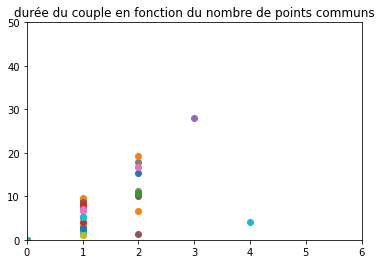

In [245]:
coordonees(50, 100) #version 1 on obtient une première courbe qui tient la route
                    #il faut affiner les fct qui détermine les individus car il y a des incohérences